# Import Library & load data

In [1]:
import numpy as np
import rembg
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
import joblib
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from skimage.feature import local_binary_pattern
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
#load data

dt = "D:/Kuliah/SKRIPSI/code file/dataset"
img_categories = os.listdir(dt)

def load_data():
    data = []
    labels = []
    for category in img_categories:
        path = os.path.join(dt, category)
        class_num = img_categories.index(category)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img))
            resized_img = cv2.resize(img_array, (500, 375)) # diperkecil dari resolusi asli
            output_rgba = rembg.remove(resized_img) # Remove background (hasilnya RGBA)

            if output_rgba.shape[2] == 4:  # Ambil RGB saja
                output_rgb = output_rgba[:, :, :3]
            else:
                output_rgb = output_rgba

            gray_image = cv2.cvtColor(output_rgb, cv2.COLOR_RGB2GRAY)   # Konversi ke grayscale agar 2 dim

            data.append(gray_image)
            labels.append(class_num)

    return data, labels

data, labels = load_data()

  0%|          | 0/150 [00:00<?, ?it/s]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  1%|          | 1/150 [00:02<05:56,  2.39s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  1%|▏         | 2/150 [00:04<05:21,  2.17s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  2%|▏         | 3/150 [00:06<05:10,  2.11s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  3%|▎         | 4/150 [00:08<05:05,  2.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  3%|▎         | 5/150 [00:10<04:59,  2.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  4%|▍         | 6/150 [00:12<04:54,  2.05s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  5%|▍         | 7/150 [00:14<04:51,  2.04s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  5%|▌         | 8/150 [00:16<04:48,  2.03s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  6%|▌         | 9/150 [00:18<04:45,  2.03s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  7%|▋         | 10/150 [00:20<04:42,  2.02s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  7%|▋         | 11/150 [00:22<04:41,  2.02s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  8%|▊         | 12/150 [00:24<04:38,  2.02s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  9%|▊         | 13/150 [00:26<04:37,  2.03s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  9%|▉         | 14/150 [00:28<04:30,  1.99s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 10%|█         | 15/150 [00:30<04:11,  1.86s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 11%|█         | 16/150 [00:31<03:53,  1.74s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 11%|█▏        | 17/150 [00:32<03:35,  1.62s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 12%|█▏        | 18/150 [00:34<03:21,  1.53s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 13%|█▎        | 19/150 [00:35<03:10,  1.45s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 13%|█▎        | 20/150 [00:36<03:00,  1.39s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 14%|█▍        | 21/150 [00:37<02:52,  1.34s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 15%|█▍        | 22/150 [00:39<02:46,  1.30s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 15%|█▌        | 23/150 [00:40<02:44,  1.30s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 16%|█▌        | 24/150 [00:41<02:40,  1.27s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 17%|█▋        | 25/150 [00:42<02:35,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 17%|█▋        | 26/150 [00:44<02:32,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 18%|█▊        | 27/150 [00:45<02:34,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 19%|█▊        | 28/150 [00:46<02:33,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 19%|█▉        | 29/150 [00:47<02:31,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 20%|██        | 30/150 [00:49<02:29,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 21%|██        | 31/150 [00:50<02:28,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 21%|██▏       | 32/150 [00:51<02:26,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 22%|██▏       | 33/150 [00:52<02:26,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 23%|██▎       | 34/150 [00:54<02:22,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 23%|██▎       | 35/150 [00:55<02:22,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 24%|██▍       | 36/150 [00:56<02:22,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 25%|██▍       | 37/150 [00:57<02:20,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 25%|██▌       | 38/150 [00:59<02:19,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 26%|██▌       | 39/150 [01:00<02:15,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 27%|██▋       | 40/150 [01:01<02:12,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 27%|██▋       | 41/150 [01:02<02:11,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 28%|██▊       | 42/150 [01:03<02:10,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 29%|██▊       | 43/150 [01:05<02:11,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 29%|██▉       | 44/150 [01:06<02:10,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 30%|███       | 45/150 [01:07<02:06,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 31%|███       | 46/150 [01:08<02:06,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 31%|███▏      | 47/150 [01:09<02:06,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 32%|███▏      | 48/150 [01:11<02:01,  1.19s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 33%|███▎      | 49/150 [01:12<02:02,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 33%|███▎      | 50/150 [01:13<02:02,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 34%|███▍      | 51/150 [01:14<02:01,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 35%|███▍      | 52/150 [01:16<02:00,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 35%|███▌      | 53/150 [01:17<01:58,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 36%|███▌      | 54/150 [01:18<01:55,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 37%|███▋      | 55/150 [01:19<01:55,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 37%|███▋      | 56/150 [01:20<01:51,  1.19s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 38%|███▊      | 57/150 [01:22<01:53,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 39%|███▊      | 58/150 [01:23<01:53,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 39%|███▉      | 59/150 [01:24<01:50,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 40%|████      | 60/150 [01:25<01:45,  1.18s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 41%|████      | 61/150 [01:26<01:44,  1.18s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 41%|████▏     | 62/150 [01:27<01:41,  1.16s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 42%|████▏     | 63/150 [01:29<01:40,  1.16s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 43%|████▎     | 64/150 [01:30<01:38,  1.15s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 43%|████▎     | 65/150 [01:31<01:40,  1.18s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 44%|████▍     | 66/150 [01:32<01:39,  1.19s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 45%|████▍     | 67/150 [01:33<01:39,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 45%|████▌     | 68/150 [01:35<01:39,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 46%|████▌     | 69/150 [01:36<01:39,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 47%|████▋     | 70/150 [01:37<01:41,  1.27s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 47%|████▋     | 71/150 [01:39<01:40,  1.27s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 48%|████▊     | 72/150 [01:40<01:37,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 49%|████▊     | 73/150 [01:41<01:45,  1.37s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 49%|████▉     | 74/150 [01:43<01:40,  1.32s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 50%|█████     | 75/150 [01:44<01:37,  1.30s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 51%|█████     | 76/150 [01:45<01:34,  1.28s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 51%|█████▏    | 77/150 [01:46<01:31,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 52%|█████▏    | 78/150 [01:47<01:28,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 53%|█████▎    | 79/150 [01:49<01:27,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 53%|█████▎    | 80/150 [01:50<01:25,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 54%|█████▍    | 81/150 [01:51<01:24,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 55%|█████▍    | 82/150 [01:52<01:22,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 55%|█████▌    | 83/150 [01:54<01:22,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 56%|█████▌    | 84/150 [01:55<01:22,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 57%|█████▋    | 85/150 [01:56<01:23,  1.29s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 57%|█████▋    | 86/150 [01:57<01:20,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 58%|█████▊    | 87/150 [01:59<01:18,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 59%|█████▊    | 88/150 [02:00<01:15,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 59%|█████▉    | 89/150 [02:01<01:14,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 60%|██████    | 90/150 [02:02<01:12,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 61%|██████    | 91/150 [02:04<01:12,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 61%|██████▏   | 92/150 [02:05<01:10,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 62%|██████▏   | 93/150 [02:06<01:11,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 63%|██████▎   | 94/150 [02:07<01:08,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 63%|██████▎   | 95/150 [02:08<01:07,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 64%|██████▍   | 96/150 [02:10<01:06,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 65%|██████▍   | 97/150 [02:11<01:05,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 65%|██████▌   | 98/150 [02:12<01:02,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 66%|██████▌   | 99/150 [02:13<01:02,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 67%|██████▋   | 100/150 [02:15<01:01,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 67%|██████▋   | 101/150 [02:16<01:00,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 68%|██████▊   | 102/150 [02:17<00:58,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 69%|██████▊   | 103/150 [02:18<00:56,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 69%|██████▉   | 104/150 [02:20<00:57,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 70%|███████   | 105/150 [02:21<00:55,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 71%|███████   | 106/150 [02:22<00:53,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 71%|███████▏  | 107/150 [02:23<00:52,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 72%|███████▏  | 108/150 [02:24<00:50,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 73%|███████▎  | 109/150 [02:26<00:49,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 73%|███████▎  | 110/150 [02:27<00:48,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 74%|███████▍  | 111/150 [02:28<00:48,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 75%|███████▍  | 112/150 [02:29<00:45,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 75%|███████▌  | 113/150 [02:30<00:44,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 76%|███████▌  | 114/150 [02:31<00:42,  1.18s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 77%|███████▋  | 115/150 [02:33<00:41,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 77%|███████▋  | 116/150 [02:34<00:40,  1.18s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 78%|███████▊  | 117/150 [02:35<00:38,  1.17s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 79%|███████▊  | 118/150 [02:36<00:37,  1.17s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 79%|███████▉  | 119/150 [02:37<00:36,  1.18s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 80%|████████  | 120/150 [02:39<00:35,  1.17s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 81%|████████  | 121/150 [02:40<00:34,  1.19s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 81%|████████▏ | 122/150 [02:41<00:33,  1.19s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 82%|████████▏ | 123/150 [02:42<00:32,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 83%|████████▎ | 124/150 [02:43<00:30,  1.18s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 83%|████████▎ | 125/150 [02:45<00:29,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 84%|████████▍ | 126/150 [02:46<00:28,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 85%|████████▍ | 127/150 [02:47<00:27,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 85%|████████▌ | 128/150 [02:48<00:26,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 86%|████████▌ | 129/150 [02:49<00:25,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 87%|████████▋ | 130/150 [02:51<00:24,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 87%|████████▋ | 131/150 [02:52<00:23,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 88%|████████▊ | 132/150 [02:53<00:21,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 89%|████████▊ | 133/150 [02:54<00:20,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 89%|████████▉ | 134/150 [02:55<00:19,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 90%|█████████ | 135/150 [02:57<00:17,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 91%|█████████ | 136/150 [02:58<00:17,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 91%|█████████▏| 137/150 [02:59<00:16,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 92%|█████████▏| 138/150 [03:00<00:14,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 93%|█████████▎| 139/150 [03:02<00:13,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 93%|█████████▎| 140/150 [03:03<00:12,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 94%|█████████▍| 141/150 [03:04<00:11,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 95%|█████████▍| 142/150 [03:05<00:09,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 95%|█████████▌| 143/150 [03:07<00:08,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 96%|█████████▌| 144/150 [03:08<00:07,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 97%|█████████▋| 145/150 [03:09<00:06,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 97%|█████████▋| 146/150 [03:10<00:04,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 98%|█████████▊| 147/150 [03:11<00:03,  1.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 99%|█████████▊| 148/150 [03:13<00:02,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 99%|█████████▉| 149/150 [03:14<00:01,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  0%|          | 0/150 [00:00<?, ?it/s]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  1%|          | 1/150 [00:01<02:54,  1.17s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  1%|▏         | 2/150 [00:02<02:54,  1.18s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  2%|▏         | 3/150 [00:03<02:52,  1.17s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  3%|▎         | 4/150 [00:04<02:51,  1.18s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  3%|▎         | 5/150 [00:05<02:51,  1.18s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  4%|▍         | 6/150 [00:07<02:50,  1.19s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  5%|▍         | 7/150 [00:08<02:52,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  5%|▌         | 8/150 [00:09<02:50,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  6%|▌         | 9/150 [00:10<02:49,  1.20s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  7%|▋         | 10/150 [00:11<02:47,  1.19s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  7%|▋         | 11/150 [00:13<02:59,  1.29s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  8%|▊         | 12/150 [00:14<02:56,  1.28s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  9%|▊         | 13/150 [00:15<02:53,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  9%|▉         | 14/150 [00:17<02:48,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 10%|█         | 15/150 [00:18<02:47,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 11%|█         | 16/150 [00:19<02:47,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 11%|█▏        | 17/150 [00:20<02:46,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 12%|█▏        | 18/150 [00:22<02:45,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 13%|█▎        | 19/150 [00:23<02:47,  1.28s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 13%|█▎        | 20/150 [00:24<02:45,  1.27s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 14%|█▍        | 21/150 [00:25<02:44,  1.27s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 15%|█▍        | 22/150 [00:27<02:41,  1.27s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 15%|█▌        | 23/150 [00:28<02:40,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 16%|█▌        | 24/150 [00:29<02:39,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 17%|█▋        | 25/150 [00:30<02:37,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 17%|█▋        | 26/150 [00:32<02:35,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 18%|█▊        | 27/150 [00:33<02:35,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 19%|█▊        | 28/150 [00:34<02:33,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 19%|█▉        | 29/150 [00:36<02:34,  1.28s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 20%|██        | 30/150 [00:37<02:31,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 21%|██        | 31/150 [00:38<02:28,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 21%|██▏       | 32/150 [00:39<02:27,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 22%|██▏       | 33/150 [00:41<02:25,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 23%|██▎       | 34/150 [00:42<02:25,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 23%|██▎       | 35/150 [00:43<02:24,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 24%|██▍       | 36/150 [00:44<02:22,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 25%|██▍       | 37/150 [00:46<02:21,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 25%|██▌       | 38/150 [00:47<02:19,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 26%|██▌       | 39/150 [00:48<02:17,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 27%|██▋       | 40/150 [00:49<02:15,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 27%|██▋       | 41/150 [00:51<02:15,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 28%|██▊       | 42/150 [00:52<02:14,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 29%|██▊       | 43/150 [00:53<02:12,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 29%|██▉       | 44/150 [00:54<02:10,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 30%|███       | 45/150 [00:55<02:10,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 31%|███       | 46/150 [00:57<02:10,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 31%|███▏      | 47/150 [00:58<02:09,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 32%|███▏      | 48/150 [00:59<02:07,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 33%|███▎      | 49/150 [01:00<02:06,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 33%|███▎      | 50/150 [01:02<02:04,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 34%|███▍      | 51/150 [01:03<02:02,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 35%|███▍      | 52/150 [01:04<02:00,  1.23s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 35%|███▌      | 53/150 [01:05<02:00,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 36%|███▌      | 54/150 [01:07<02:01,  1.27s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 37%|███▋      | 55/150 [01:08<01:59,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 37%|███▋      | 56/150 [01:09<01:57,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 38%|███▊      | 57/150 [01:10<01:56,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 39%|███▊      | 58/150 [01:12<01:56,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 39%|███▉      | 59/150 [01:13<01:57,  1.29s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 40%|████      | 60/150 [01:14<01:55,  1.28s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 41%|████      | 61/150 [01:16<01:52,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 41%|████▏     | 62/150 [01:17<01:50,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 42%|████▏     | 63/150 [01:18<01:49,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 43%|████▎     | 64/150 [01:19<01:49,  1.27s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 43%|████▎     | 65/150 [01:21<01:47,  1.27s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 44%|████▍     | 66/150 [01:22<01:48,  1.29s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 45%|████▍     | 67/150 [01:23<01:46,  1.29s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 45%|████▌     | 68/150 [01:25<01:45,  1.29s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 46%|████▌     | 69/150 [01:26<01:43,  1.28s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 47%|████▋     | 70/150 [01:27<01:42,  1.28s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 47%|████▋     | 71/150 [01:28<01:40,  1.27s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 48%|████▊     | 72/150 [01:30<01:38,  1.27s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 49%|████▊     | 73/150 [01:31<01:37,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 49%|████▉     | 74/150 [01:32<01:35,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 50%|█████     | 75/150 [01:33<01:34,  1.26s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 51%|█████     | 76/150 [01:35<01:32,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 51%|█████▏    | 77/150 [01:36<01:31,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 52%|█████▏    | 78/150 [01:37<01:29,  1.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 53%|█████▎    | 79/150 [01:43<03:01,  2.56s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 53%|█████▎    | 80/150 [01:45<02:59,  2.57s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 54%|█████▍    | 81/150 [01:47<02:45,  2.40s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 55%|█████▍    | 82/150 [01:49<02:30,  2.22s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 55%|█████▌    | 83/150 [01:51<02:20,  2.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 56%|█████▌    | 84/150 [01:53<02:13,  2.02s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 57%|█████▋    | 85/150 [01:54<02:03,  1.90s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 57%|█████▋    | 86/150 [01:56<01:54,  1.80s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 58%|█████▊    | 87/150 [01:57<01:48,  1.72s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 59%|█████▊    | 88/150 [12:33<3:18:19, 191.93s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 59%|█████▉    | 89/150 [12:35<2:17:10, 134.92s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 60%|██████    | 90/150 [12:37<1:34:51, 94.86s/it] 

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 61%|██████    | 91/150 [12:38<1:05:41, 66.80s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 61%|██████▏   | 92/150 [12:39<45:34, 47.15s/it]  

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 62%|██████▏   | 93/150 [12:40<31:44, 33.40s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 63%|██████▎   | 94/150 [12:42<22:12, 23.80s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 63%|██████▎   | 95/150 [12:43<15:43, 17.15s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 64%|██████▍   | 96/150 [12:45<11:11, 12.43s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 65%|██████▍   | 97/150 [12:47<08:10,  9.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 65%|██████▌   | 98/150 [12:48<05:58,  6.89s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 66%|██████▌   | 99/150 [12:50<04:27,  5.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 67%|██████▋   | 100/150 [12:51<03:24,  4.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 67%|██████▋   | 101/150 [12:52<02:38,  3.24s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 68%|██████▊   | 102/150 [12:53<02:07,  2.65s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 69%|██████▊   | 103/150 [12:55<01:43,  2.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 69%|██████▉   | 104/150 [12:56<01:34,  2.06s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 70%|███████   | 105/150 [12:58<01:26,  1.93s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 71%|███████   | 106/150 [12:59<01:14,  1.70s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 71%|███████▏  | 107/150 [13:00<01:07,  1.56s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 72%|███████▏  | 108/150 [13:02<01:01,  1.46s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 73%|███████▎  | 109/150 [13:03<00:56,  1.37s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 73%|███████▎  | 110/150 [13:04<00:52,  1.31s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 74%|███████▍  | 111/150 [13:05<00:49,  1.27s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 75%|███████▍  | 112/150 [13:06<00:47,  1.25s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 75%|███████▌  | 113/150 [13:07<00:44,  1.21s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 76%|███████▌  | 114/150 [13:09<00:42,  1.17s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 77%|███████▋  | 115/150 [13:10<00:39,  1.14s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 77%|███████▋  | 116/150 [13:11<00:37,  1.12s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 78%|███████▊  | 117/150 [13:12<00:36,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 79%|███████▊  | 118/150 [13:13<00:34,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 79%|███████▉  | 119/150 [13:14<00:33,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 80%|████████  | 120/150 [13:15<00:32,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 81%|████████  | 121/150 [13:16<00:31,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 81%|████████▏ | 122/150 [13:17<00:30,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 82%|████████▏ | 123/150 [13:18<00:29,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 83%|████████▎ | 124/150 [13:19<00:28,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 83%|████████▎ | 125/150 [13:20<00:27,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 84%|████████▍ | 126/150 [13:21<00:26,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 85%|████████▍ | 127/150 [13:23<00:25,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 85%|████████▌ | 128/150 [13:24<00:23,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 86%|████████▌ | 129/150 [13:25<00:23,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 87%|████████▋ | 130/150 [13:26<00:21,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 87%|████████▋ | 131/150 [13:27<00:20,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 88%|████████▊ | 132/150 [13:28<00:19,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 89%|████████▊ | 133/150 [13:29<00:18,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 89%|████████▉ | 134/150 [13:30<00:17,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 90%|█████████ | 135/150 [13:31<00:16,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 91%|█████████ | 136/150 [13:32<00:15,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 91%|█████████▏| 137/150 [13:33<00:14,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 92%|█████████▏| 138/150 [13:34<00:12,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 93%|█████████▎| 139/150 [13:36<00:11,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 93%|█████████▎| 140/150 [13:37<00:10,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 94%|█████████▍| 141/150 [13:38<00:09,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 95%|█████████▍| 142/150 [13:39<00:08,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 95%|█████████▌| 143/150 [13:40<00:07,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 96%|█████████▌| 144/150 [13:41<00:06,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 97%|█████████▋| 145/150 [13:42<00:05,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 97%|█████████▋| 146/150 [13:43<00:04,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 98%|█████████▊| 147/150 [13:44<00:03,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 99%|█████████▊| 148/150 [13:45<00:02,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 99%|█████████▉| 149/150 [13:46<00:01,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  0%|          | 0/150 [00:00<?, ?it/s]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  1%|          | 1/150 [00:01<02:37,  1.06s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  1%|▏         | 2/150 [00:02<02:39,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  2%|▏         | 3/150 [00:03<02:36,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  3%|▎         | 4/150 [00:04<02:34,  1.06s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  3%|▎         | 5/150 [00:05<02:32,  1.05s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  4%|▍         | 6/150 [00:06<02:32,  1.06s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  5%|▍         | 7/150 [00:07<02:31,  1.06s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  5%|▌         | 8/150 [00:08<02:29,  1.05s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  6%|▌         | 9/150 [00:09<02:28,  1.06s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  7%|▋         | 10/150 [00:10<02:29,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  7%|▋         | 11/150 [00:11<02:27,  1.06s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  8%|▊         | 12/150 [00:12<02:29,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  9%|▊         | 13/150 [00:13<02:27,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


  9%|▉         | 14/150 [00:14<02:26,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 10%|█         | 15/150 [00:15<02:23,  1.06s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 11%|█         | 16/150 [00:17<02:24,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 11%|█▏        | 17/150 [00:18<02:23,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 12%|█▏        | 18/150 [00:19<02:23,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 13%|█▎        | 19/150 [00:20<02:22,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 13%|█▎        | 20/150 [00:21<02:21,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 14%|█▍        | 21/150 [00:22<02:19,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 15%|█▍        | 22/150 [00:23<02:19,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 15%|█▌        | 23/150 [00:24<02:18,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 16%|█▌        | 24/150 [00:25<02:17,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 17%|█▋        | 25/150 [00:26<02:16,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 17%|█▋        | 26/150 [00:27<02:15,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 18%|█▊        | 27/150 [00:29<02:12,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 19%|█▊        | 28/150 [00:30<02:11,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 19%|█▉        | 29/150 [00:31<02:09,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 20%|██        | 30/150 [00:32<02:10,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 21%|██        | 31/150 [00:33<02:07,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 21%|██▏       | 32/150 [00:34<02:07,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 22%|██▏       | 33/150 [00:35<02:04,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 23%|██▎       | 34/150 [00:36<02:04,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 23%|██▎       | 35/150 [00:37<02:04,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 24%|██▍       | 36/150 [00:38<02:04,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 25%|██▍       | 37/150 [00:39<02:02,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 25%|██▌       | 38/150 [00:40<02:01,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 26%|██▌       | 39/150 [00:41<01:58,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 27%|██▋       | 40/150 [00:43<01:58,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 27%|██▋       | 41/150 [00:44<01:56,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 28%|██▊       | 42/150 [00:45<01:56,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 29%|██▊       | 43/150 [00:46<01:54,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 29%|██▉       | 44/150 [00:47<01:55,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 30%|███       | 45/150 [00:48<01:53,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 31%|███       | 46/150 [00:49<01:53,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 31%|███▏      | 47/150 [00:50<01:52,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 32%|███▏      | 48/150 [00:51<01:51,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 33%|███▎      | 49/150 [00:52<01:50,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 33%|███▎      | 50/150 [00:53<01:48,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 34%|███▍      | 51/150 [00:54<01:46,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 35%|███▍      | 52/150 [00:56<01:45,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 35%|███▌      | 53/150 [00:57<01:44,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 36%|███▌      | 54/150 [00:58<01:43,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 37%|███▋      | 55/150 [00:59<01:41,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 37%|███▋      | 56/150 [01:00<01:41,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 38%|███▊      | 57/150 [01:01<01:39,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 39%|███▊      | 58/150 [01:02<01:39,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 39%|███▉      | 59/150 [01:03<01:38,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 40%|████      | 60/150 [01:04<01:37,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 41%|████      | 61/150 [01:05<01:35,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 41%|████▏     | 62/150 [01:06<01:34,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 42%|████▏     | 63/150 [01:07<01:32,  1.06s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 43%|████▎     | 64/150 [01:08<01:31,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 43%|████▎     | 65/150 [01:09<01:30,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 44%|████▍     | 66/150 [01:11<01:30,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 45%|████▍     | 67/150 [01:12<01:29,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 45%|████▌     | 68/150 [01:13<01:27,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 46%|████▌     | 69/150 [01:14<01:26,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 47%|████▋     | 70/150 [01:15<01:26,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 47%|████▋     | 71/150 [01:16<01:25,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 48%|████▊     | 72/150 [01:17<01:25,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 49%|████▊     | 73/150 [01:18<01:23,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 49%|████▉     | 74/150 [01:19<01:22,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 50%|█████     | 75/150 [01:20<01:20,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 51%|█████     | 76/150 [01:21<01:20,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 51%|█████▏    | 77/150 [01:22<01:19,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 52%|█████▏    | 78/150 [01:24<01:17,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 53%|█████▎    | 79/150 [01:25<01:16,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 53%|█████▎    | 80/150 [01:26<01:16,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 54%|█████▍    | 81/150 [01:27<01:14,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 55%|█████▍    | 82/150 [01:28<01:14,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 55%|█████▌    | 83/150 [01:29<01:13,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 56%|█████▌    | 84/150 [01:30<01:12,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 57%|█████▋    | 85/150 [01:31<01:10,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 57%|█████▋    | 86/150 [01:32<01:09,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 58%|█████▊    | 87/150 [01:33<01:08,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 59%|█████▊    | 88/150 [01:34<01:07,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 59%|█████▉    | 89/150 [01:36<01:05,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 60%|██████    | 90/150 [01:37<01:05,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 61%|██████    | 91/150 [01:38<01:03,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 61%|██████▏   | 92/150 [01:39<01:02,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 62%|██████▏   | 93/150 [01:40<01:01,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 63%|██████▎   | 94/150 [01:41<01:01,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 63%|██████▎   | 95/150 [01:42<00:59,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 64%|██████▍   | 96/150 [01:43<00:59,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 65%|██████▍   | 97/150 [01:44<00:57,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 65%|██████▌   | 98/150 [01:45<00:56,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 66%|██████▌   | 99/150 [01:46<00:55,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 67%|██████▋   | 100/150 [01:47<00:54,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 67%|██████▋   | 101/150 [01:49<00:52,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 68%|██████▊   | 102/150 [01:50<00:52,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 69%|██████▊   | 103/150 [01:51<00:51,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 69%|██████▉   | 104/150 [01:52<00:50,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 70%|███████   | 105/150 [01:53<00:48,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 71%|███████   | 106/150 [01:54<00:48,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 71%|███████▏  | 107/150 [01:55<00:46,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 72%|███████▏  | 108/150 [01:56<00:45,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 73%|███████▎  | 109/150 [01:57<00:44,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 73%|███████▎  | 110/150 [01:58<00:43,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 74%|███████▍  | 111/150 [01:59<00:41,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 75%|███████▍  | 112/150 [02:00<00:41,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 75%|███████▌  | 113/150 [02:02<00:39,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 76%|███████▌  | 114/150 [02:03<00:38,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 77%|███████▋  | 115/150 [02:04<00:37,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 77%|███████▋  | 116/150 [02:05<00:36,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 78%|███████▊  | 117/150 [02:06<00:35,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 79%|███████▊  | 118/150 [02:07<00:33,  1.06s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 79%|███████▉  | 119/150 [02:08<00:33,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 80%|████████  | 120/150 [02:09<00:32,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 81%|████████  | 121/150 [02:10<00:31,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 81%|████████▏ | 122/150 [02:11<00:29,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 82%|████████▏ | 123/150 [02:12<00:28,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 83%|████████▎ | 124/150 [02:13<00:27,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 83%|████████▎ | 125/150 [02:14<00:26,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 84%|████████▍ | 126/150 [02:16<00:25,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 85%|████████▍ | 127/150 [02:17<00:24,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 85%|████████▌ | 128/150 [02:18<00:23,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 86%|████████▌ | 129/150 [02:19<00:22,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 87%|████████▋ | 130/150 [02:20<00:21,  1.06s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 87%|████████▋ | 131/150 [02:21<00:20,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 88%|████████▊ | 132/150 [02:22<00:19,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 89%|████████▊ | 133/150 [02:23<00:18,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 89%|████████▉ | 134/150 [02:24<00:17,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 90%|█████████ | 135/150 [02:25<00:16,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 91%|█████████ | 136/150 [02:26<00:15,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 91%|█████████▏| 137/150 [02:27<00:14,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 92%|█████████▏| 138/150 [02:28<00:12,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 93%|█████████▎| 139/150 [02:30<00:11,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 93%|█████████▎| 140/150 [02:31<00:10,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 94%|█████████▍| 141/150 [02:32<00:09,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 95%|█████████▍| 142/150 [02:33<00:08,  1.07s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 95%|█████████▌| 143/150 [02:34<00:07,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 96%|█████████▌| 144/150 [02:35<00:06,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 97%|█████████▋| 145/150 [02:36<00:05,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 97%|█████████▋| 146/150 [02:37<00:04,  1.08s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 98%|█████████▊| 147/150 [02:38<00:03,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 99%|█████████▊| 148/150 [02:39<00:02,  1.09s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


 99%|█████████▉| 149/150 [02:40<00:01,  1.10s/it]

*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


100%|██████████| 150/150 [02:41<00:00,  1.08s/it]


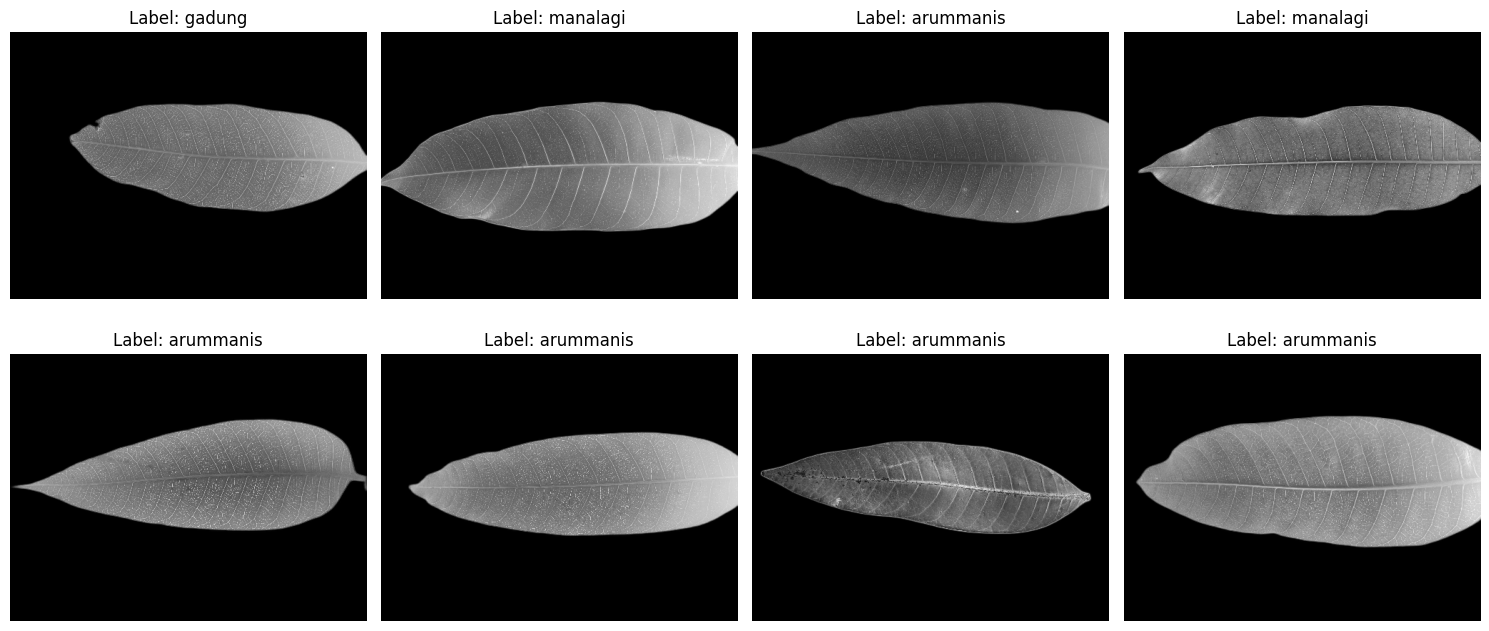

In [3]:
# visualisasi data
def visualize_dataset(data, labels, img_categories, num_samples=8):
    plt.figure(figsize=(15, 10))
    img = random.sample(range(len(data)), num_samples)

    for i, idx in enumerate(img):
        plt.subplot(3, 4, i+1)
        plt.imshow(data[idx], cmap='gray')
        plt.title(f"Label: {img_categories[labels[idx]]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

visualize_dataset(data, labels, img_categories)


In [61]:
img_categories

['arummanis', 'gadung', 'manalagi']

# Local Binarry Pattern

In [7]:
# Fungsi ekstraksi LBP histogram
'''
R(radius) jari jari dr titik pusat ke titik sampel 
P(Point)  jumlah titik sampel yang digunakan disekeliling titik pusat
'''

def extract_lbp_features(images, P=24, R=3, method='uniform'):
    features = []
    lbp_images = []  
    for img in images:
        lbp = local_binary_pattern(img, P, R, method)
        
        # Masking hanya area objek (bukan background 0)
        mask = (img > 0)  
        lbp_masked = lbp[mask]

        # Hitung histogram LBP
        n_bins = int(lbp.max() + 1)
        hist, _ = np.histogram(lbp_masked, bins=n_bins, range=(0, n_bins), density=True)
        features.append(hist)
        lbp_images.append(lbp)

    return np.array(features), lbp_images

features, lbp_images = extract_lbp_features(data)

In [ ]:
# melihat perbedaan nilai fitur antar kelas P=8 R=1
print(f'Fitur {img_categories[labels[1]]}\n', features[10])
print(f'Fitur {img_categories[labels[150]]}\n', features[150])
print(f'Fitur {img_categories[labels[300]]}\n', features[300])

Fitur arummanis
 [0.13122589 0.10177815 0.0342083  0.04105748 0.05637407 0.05313764
 0.05710791 0.11455452 0.1732242  0.23733183]
Fitur gadung
 [0.12235656 0.10091415 0.03568119 0.04587581 0.08652793 0.06898222
 0.06257899 0.1078229  0.14925436 0.2200059 ]
Fitur manalagi
 [0.12990567 0.09300301 0.02892091 0.04254172 0.07075775 0.06339795
 0.05622473 0.11425314 0.17688401 0.22411112]


In [45]:
# melihat perbedaan nilai fitur antar kelas P=16 R=2
print(f'Fitur {img_categories[labels[1]]}\n', features[10])
print(f'Fitur {img_categories[labels[150]]}\n', features[150])
print(f'Fitur {img_categories[labels[300]]}\n', features[300])

Fitur arummanis
 [0.09317904 0.05404083 0.0168219  0.00792172 0.00506162 0.0054944
 0.0058331  0.01042431 0.022655   0.01456393 0.00754539 0.00694327
 0.00859912 0.0130398  0.02988052 0.07387337 0.1160222  0.50810048]
Fitur gadung
 [0.09151993 0.05322689 0.01632404 0.00846744 0.0061926  0.00707726
 0.00726683 0.01295391 0.03690286 0.02180049 0.01124779 0.01082652
 0.01200607 0.01615553 0.0277614  0.06344258 0.10007162 0.49675626]
Fitur manalagi
 [0.09532497 0.04805639 0.01345496 0.00646833 0.00393905 0.00480979
 0.00530735 0.01312325 0.03675754 0.01899036 0.0063854  0.0059915
 0.00740126 0.01140251 0.02800871 0.07623095 0.12088732 0.49746035]


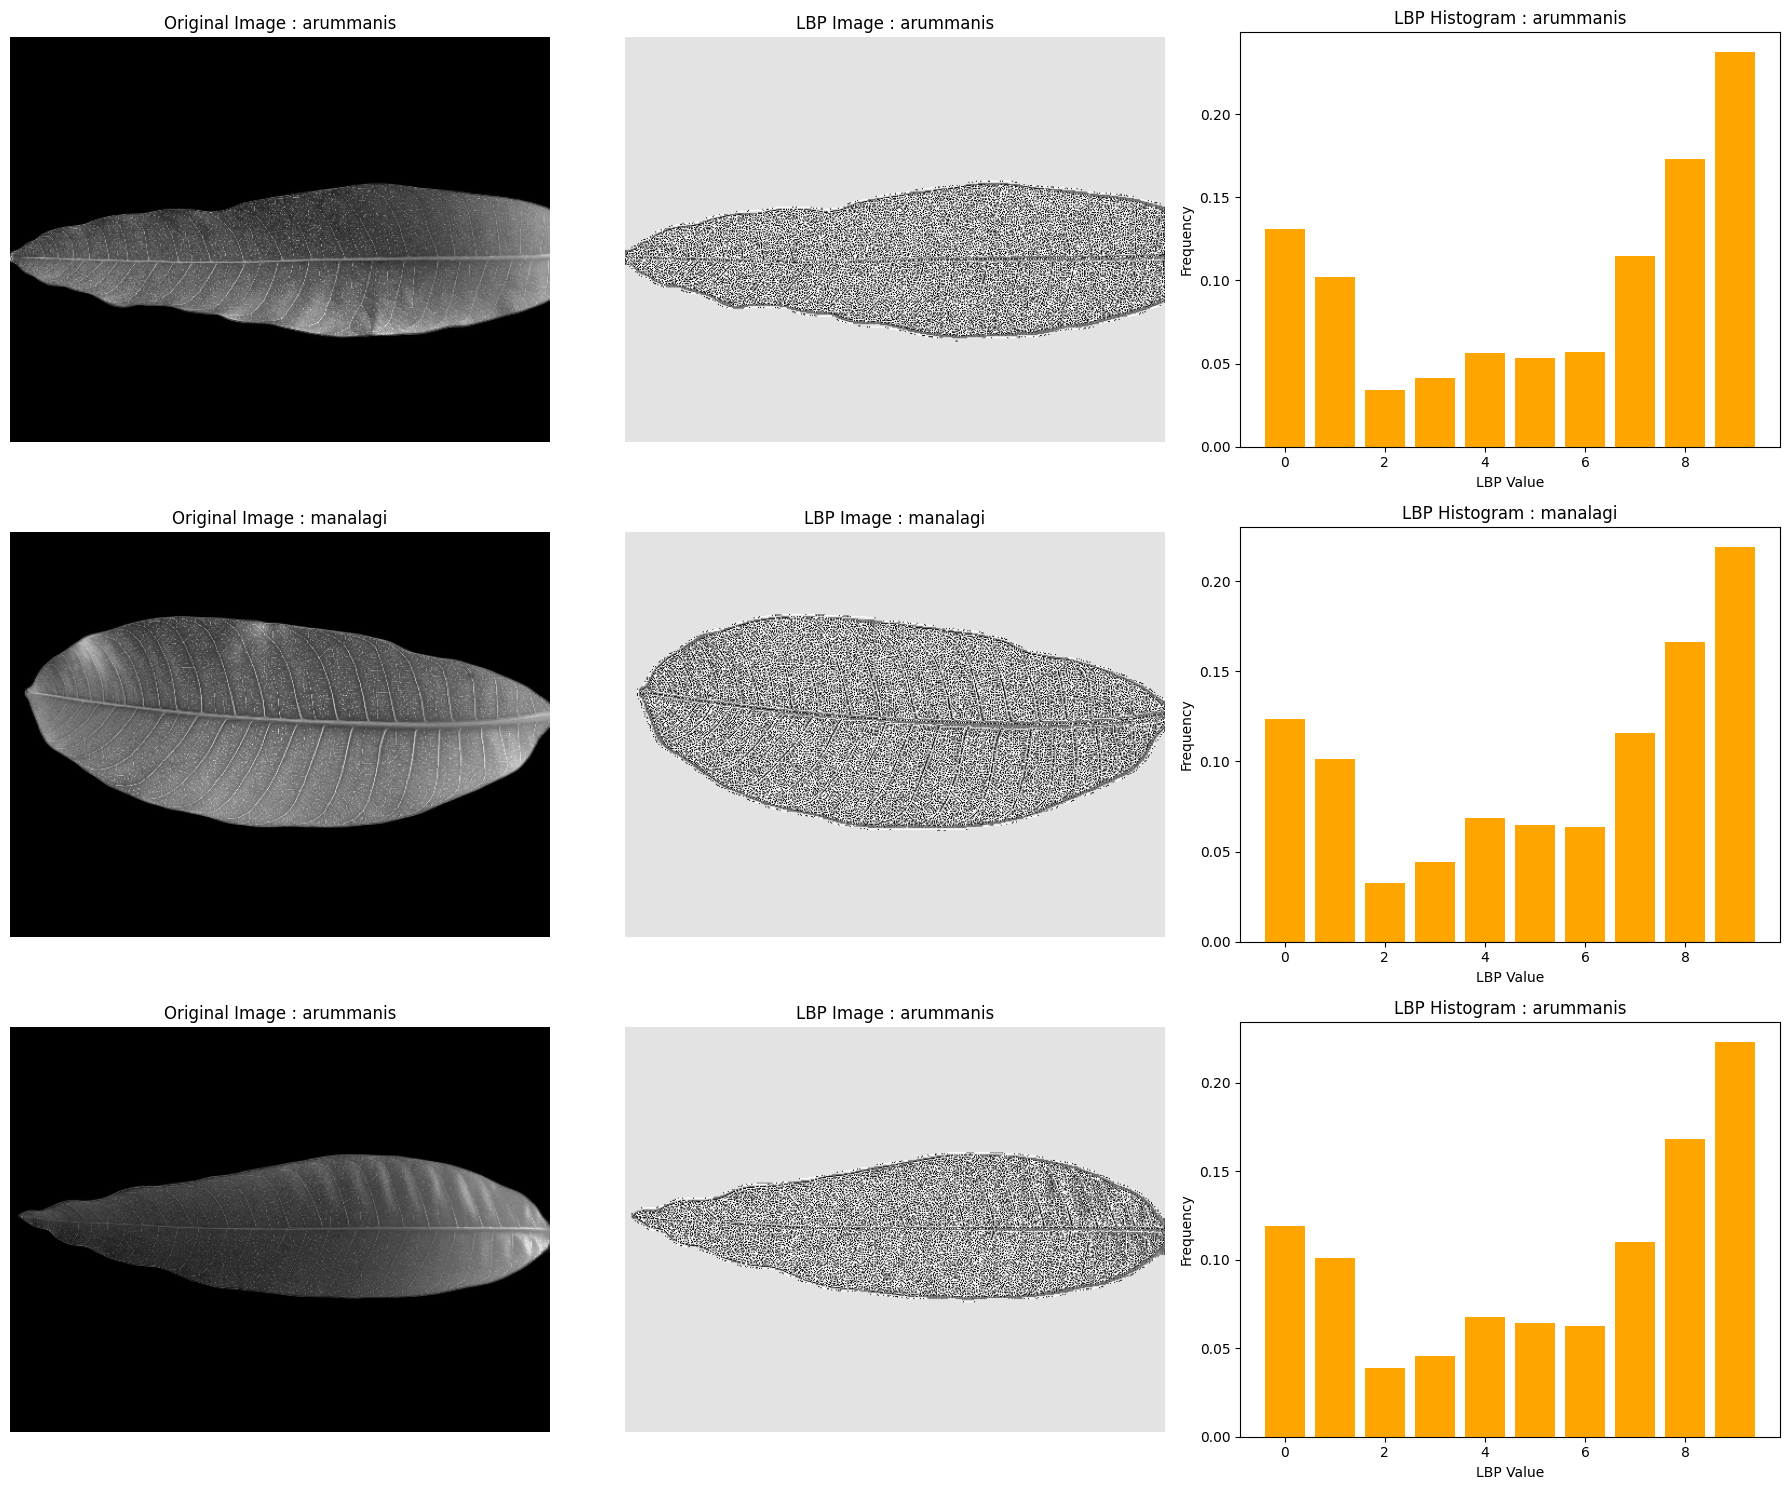

In [12]:
# visualisasi LBP
def visualize_lbp_results(original_images, lbp_images, features, labels):
    num_images = len(original_images)
    plt.figure(figsize=(18, 5 * num_images))
    
    for i in range(num_images):
        n_bins = len(features[i])

        plt.subplot(num_images, 3, 3*i+1)
        plt.imshow(original_images[i], cmap='gray')
        plt.title(f'Original Image : {img_categories[labels[i]]}')
        plt.axis('off')

        plt.subplot(num_images, 3, 3*i+2)
        plt.imshow(lbp_images[i], cmap='gray')
        plt.title(f'LBP Image : {img_categories[labels[i]]}')
        plt.axis('off')

        plt.subplot(num_images, 3, 3*i+3)
        plt.bar(range(n_bins), features[i], width=0.8, color='orange')
        plt.title(f'LBP Histogram : {img_categories[labels[i]]}')
        plt.xlabel('LBP Value')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

random_indices = np.random.choice(len(data), size=3, replace=False)

# Ambil data yang sesuai indeksnya
selected_images = [data[i] for i in random_indices]
selected_lbp = [lbp_images[i] for i in random_indices]
selected_features = [features[i] for i in random_indices]
selected_labels = [labels[i] for i in random_indices]

visualize_lbp_results(selected_images, selected_lbp, selected_features, selected_labels)

In [44]:
# save feature LBP ke file excel
def save_features_to_excel(features, labels, output_file='lbp_features324.xlsx'):
    # Buat nama kolom untuk setiap fitur
    column_names = [f'LBP{i}' for i in range(features.shape[1])]
    
    # Buat DataFrame dari fitur
    df = pd.DataFrame(features, columns=column_names)
    
    # Tambahkan kolom image index dan label
    df.insert(0, 'Image_ID', range(1, len(features)+1))
    df['Label'] = labels
    
    # Simpan ke file Excel
    df.to_excel(output_file, index=False)
    print(f"Features and labels saved to {output_file}")

save_features_to_excel(features, labels)


Features and labels saved to lbp_features324.xlsx


In [79]:
import seaborn as sns
from sklearn.decomposition import PCA

# Separate features and label
fitur = pd.read_excel('lbp_features.xlsx')
x = fitur[['LBP3', 'LBP9']]
y = fitur['Label']
print(x)
# Reduce dimensions to 2 components
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(x)

# Create new DataFrame for plotting
# df_plot = x, columns=['lbp1', 'lbp2']
# df_plot['label'] = y

# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df_plot, x='lbp1', y='lbp2', hue='label', palette='Set1', s=100)
# plt.title('LBP Feature by Class ')
# plt.xlabel('fitur 1')
# plt.ylabel('fitur 2')
# plt.legend(title='Class')
# plt.grid(True)
# plt.show()



         LBP3      LBP9
0    0.041095  0.229291
1    0.040294  0.234499
2    0.047685  0.231974
3    0.047050  0.229081
4    0.051077  0.227382
..        ...       ...
445  0.042862  0.233581
446  0.046181  0.227184
447  0.046702  0.228325
448  0.039515  0.225056
449  0.039775  0.226026

[450 rows x 2 columns]


## Klasifikasi

Accuracy: 0.5777777777777777
              precision    recall  f1-score   support

           0       0.80      0.27      0.40        30
           1       1.00      0.53      0.70        30
           2       0.44      0.93      0.60        30

    accuracy                           0.58        90
   macro avg       0.75      0.58      0.56        90
weighted avg       0.75      0.58      0.56        90



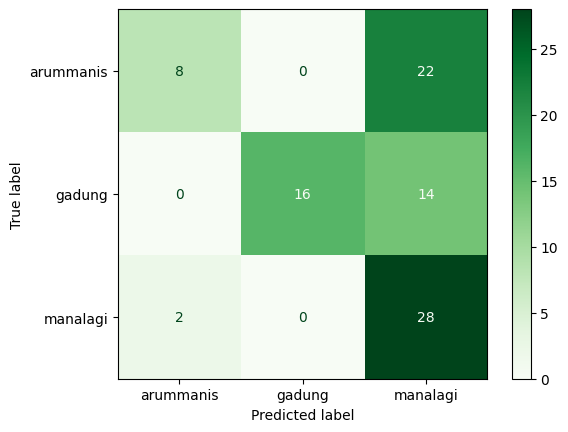

In [8]:
# training SVM 80:20
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)
clf = SVC(kernel='poly', degree=3, C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
    
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=img_categories)
disp.plot(cmap=plt.cm.Greens) 
plt.show()

Accuracy: 0.5481481481481482
              precision    recall  f1-score   support

           0       0.80      0.18      0.29        45
           1       1.00      0.49      0.66        45
           2       0.43      0.98      0.59        45

    accuracy                           0.55       135
   macro avg       0.74      0.55      0.51       135
weighted avg       0.74      0.55      0.51       135



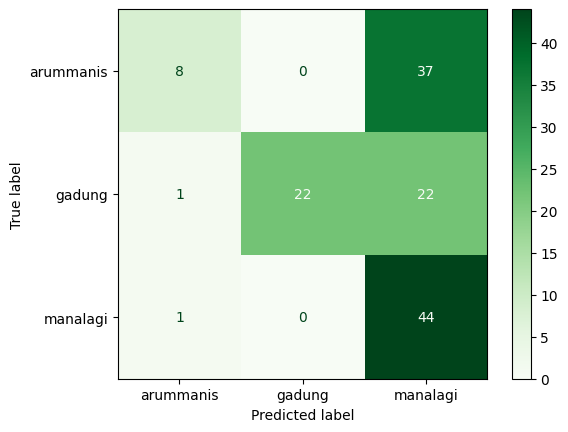

In [9]:
# training SVM 70:30
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)
clf = SVC(kernel='poly', degree=3, C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
    
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),  display_labels=img_categories)
disp.plot(cmap=plt.cm.Greens) 
plt.show()

# Gabor Filter

In [ ]:
# Parameter
ksize = (15,15)
sigma = 4
theta_list = np.linspace(0, np.pi, 8, endpoint=False)
lambda_list = [np.pi/8, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
gamma = 1
psi = 0

# membuat filter bank
def create_gabor_filter_bank():
    filters = []
    for theta in theta_list:
        for lambd in lambda_list:
            kernel = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
            filters.append((kernel, theta, lambd))
    return filters

# ekstraksi fitur Gabor
def apply_gabor_filters(image, filters):
    filtered_images = []
    for kernel, theta, lambd in filters:
        filtered = cv2.filter2D(image, cv2.CV_64F, kernel)
        filtered_images.append(filtered)
    return filtered_images

# gambar dan proses
def gabor_extraction(data, labels):
    filters = create_gabor_filter_bank()
    feature_data = []

    for i in tqdm(range(len(data)), desc="Memproses gambar"):
        gray_image = data[i]  # ambil gambar hasil preprocessing dari load_data()
        filtered_images = apply_gabor_filters(gray_image, filters)
        
        # Buat mask objek (anggap nilai piksel objek lebih dari 10)
        _, mask = cv2.threshold(gray_image, 10, 255, cv2.THRESH_BINARY)
        mask = mask.astype(bool)

        filtered_images = apply_gabor_filters(gray_image, filters)
        
        features = []
        for fimg in filtered_images:
            # Hitung mean dan varian hanya untuk area objek (mask == True)
            masked_values = fimg[mask]
            mean_val = masked_values.mean()
            var_val = masked_values.var()
            features.extend([mean_val, var_val])

        feature_data.append(features)

    return np.array(feature_data), np.array(labels)


#load dan proses data
feature_dataGbr, feature_labelsGbr = gabor_extraction(data, labels)

print("Jumlah data:", len(feature_dataGbr))


Memproses gambar: 100%|██████████| 450/450 [03:45<00:00,  2.00it/s]

Jumlah data: 450


In [36]:
def save_gabor_features_to_excel(feature_data, labels, output_file='gabor_features2.xlsx'):
    """
    Save Gabor features to an Excel file with proper column naming
    
    Parameters:
    - feature_data: numpy array of Gabor features (from gabor_extraction)
    - labels: corresponding labels for each image
    - output_file: output Excel filename
    """
    # Generate descriptive column names
    columns = []
    theta_list = np.linspace(0, np.pi, 8, endpoint=False)
    lambda_list = [np.pi/8, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
    
    for theta_idx, theta in enumerate(theta_list):
        for lambda_idx, lambd in enumerate(lambda_list):
            base_name = f"θ{theta_idx+1}_λ{lambda_idx+1}"
            columns.append(f"{base_name}_mean")
            columns.append(f"{base_name}_var")
    
    # Create DataFrame
    df = pd.DataFrame(feature_data, columns=columns)
    
    # Add labels column
    df['Label'] = labels
    
    # Add image ID column
    df.insert(0, 'Image_ID', range(1, len(feature_data)+1))
    
    # Save to Excel
    df.to_excel(output_file, index=False)
    print(f"Successfully saved Gabor features to {output_file}")
save_gabor_features_to_excel(feature_dataGbr, feature_labelsGbr, 'gabor_features1010506.xlsx')

Successfully saved Gabor features to gabor_features1010506.xlsx


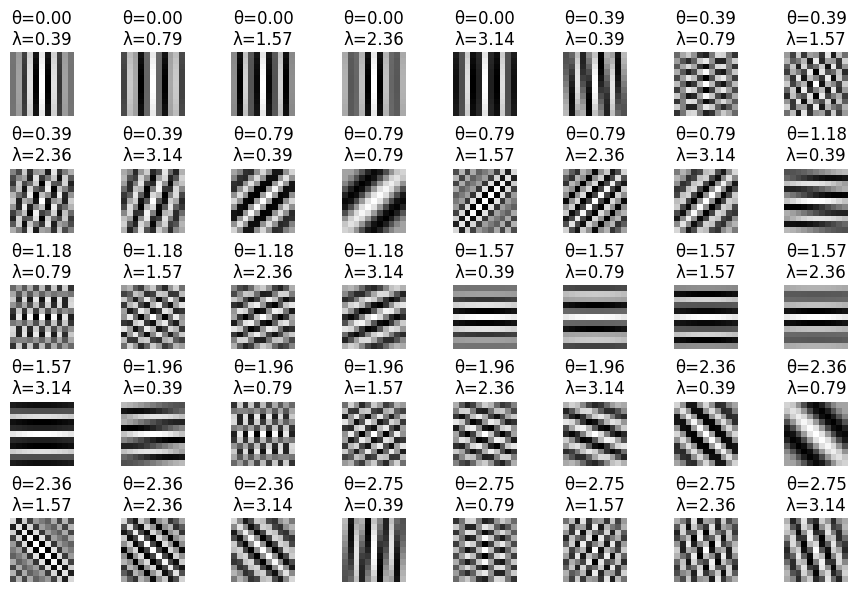

In [34]:
# Menampilkan Kernel
plt.figure(figsize=(9,6))
for i, (kernel, theta, lambd) in enumerate(create_gabor_filter_bank()):
    plt.subplot(len(lambda_list), len(theta_list), i+1)
    plt.imshow(kernel, cmap='gray')
    plt.title(f"θ={theta:.2f}\nλ={lambd:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

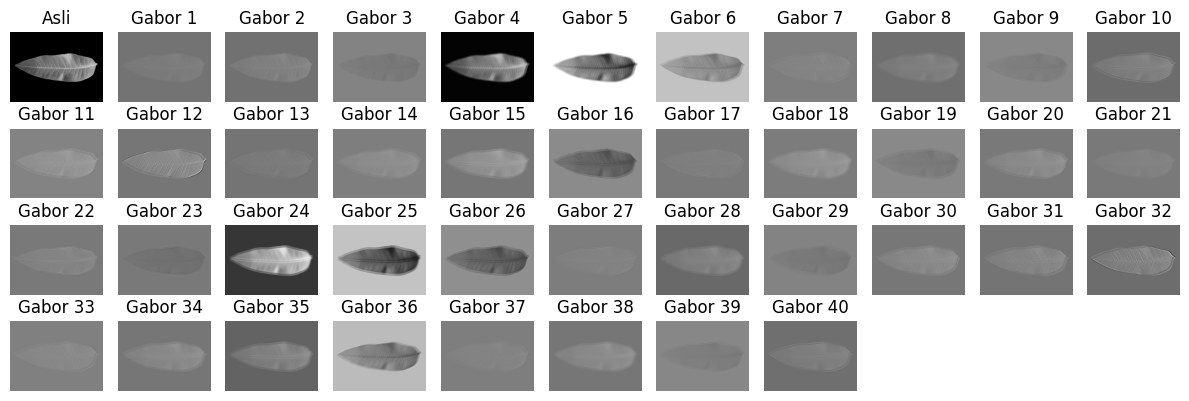

In [37]:
# Menampilkan data hasil filter
def show_example_image(img_path, filters):
    img = img_path
    filtered_images = apply_gabor_filters(img, filters)

    plt.figure(figsize=(12, 6))
    plt.subplot(6, 11, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Asli')
    plt.axis('off')

    for i in range(len(filtered_images)):
        plt.subplot(6, 11, i+2)
        plt.imshow(filtered_images[i], cmap='gray')
        plt.title(f'Gabor {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Panggil contoh
filters = create_gabor_filter_bank()
example_path = data[160]
show_example_image(example_path, filters)


## Klasifikasi

Akurasi: 0.7555555555555555

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        45
           1       0.75      0.67      0.71        45
           2       0.76      0.84      0.80        45

    accuracy                           0.76       135
   macro avg       0.76      0.76      0.75       135
weighted avg       0.76      0.76      0.75       135



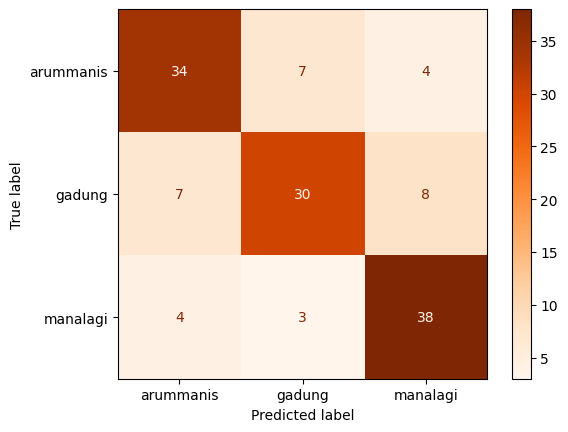

In [11]:
# Split data 70:30
X_train, X_test, y_train, y_test = train_test_split(
    feature_dataGbr, feature_labelsGbr, test_size=0.3, random_state=42, stratify=feature_labelsGbr)

# Buat model SVM Polynomial kernel degree 3
svm_model = SVC(kernel='poly', degree=3, C=1)
svm_model.fit(X_train, y_train)

# Prediksi
y_pred = svm_model.predict(X_test)

# Evaluasi hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=img_categories)
disp.plot(cmap=plt.cm.Oranges) 
plt.show()

Akurasi: 0.7888888888888889

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.87      0.67      0.75        30
           2       0.75      0.90      0.82        30

    accuracy                           0.79        90
   macro avg       0.80      0.79      0.79        90
weighted avg       0.80      0.79      0.79        90



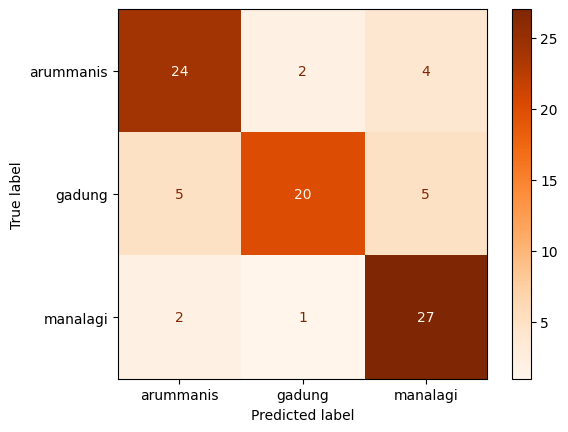

In [12]:
# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    feature_dataGbr, feature_labelsGbr, test_size=0.2, random_state=42, stratify=feature_labelsGbr)

# Buat model SVM Polynomial kernel degree 3
svm_model = SVC(kernel='poly', degree=3, C=1)
svm_model.fit(X_train, y_train)

# Prediksi
y_pred = svm_model.predict(X_test)

# Evaluasi hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=img_categories)
disp.plot(cmap=plt.cm.Oranges) 
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_model, feature_dataGbr, feature_labelsGbr, cv=cv)

print("Cross-validation scores:", scores)
print("Rata-rata akurasi: {:.2f}%".format(scores.mean() * 100))

Cross-validation scores: [0.56666667 0.53333333 0.62222222 0.56666667 0.52222222]
Rata-rata akurasi: 56.22%


# LBP & Gabor Filter

In [2]:
# read data excel
lbp_df = pd.read_excel("lbp_features324.xlsx")
gabor_df = pd.read_excel("gabor_features41.xlsx")

print(gabor_df.shape, lbp_df.shape)

(450, 82) (450, 28)


In [3]:
merged_df = pd.merge(lbp_df, gabor_df, on=["Image_ID", "Label"]) # kolom id dan label dijadikan satu

X = merged_df.drop(columns=["Image_ID", "Label"]) # ambil data inti tanpa label dan id
y = merged_df["Label"] # ambil label aja

scaler = MinMaxScaler() # normalisasi data
X_scaled = scaler.fit_transform(X)

joblib.dump(scaler, 'scaler.pkl')

df_scaled = pd.DataFrame(X_scaled)
print(X.shape)


(450, 106)


In [4]:
img_categories = ['arummanis', 'gadung', 'manalagi']

## Klasifikasi

Akurasi: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.93      0.91      0.92        45
           2       0.95      0.93      0.94        45

    accuracy                           0.93       135
   macro avg       0.93      0.93      0.93       135
weighted avg       0.93      0.93      0.93       135



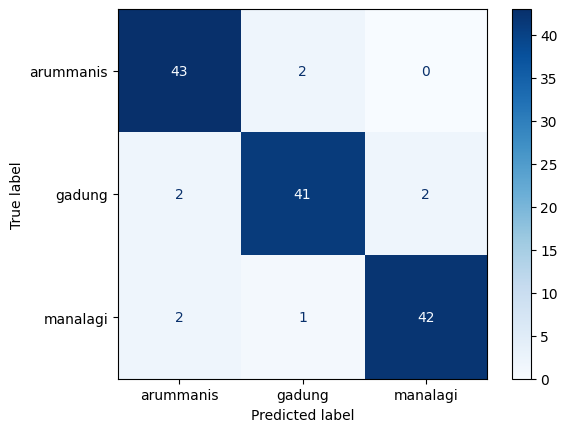

In [14]:
# skenario 70:30
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Buat model SVM Polynomial kernel degree 3
svm_model = SVC(kernel='poly', degree=3, C=1)
svm_model.fit(X_train, y_train)

# Prediksi
y_pred = svm_model.predict(X_test)

# Evaluasi hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=img_categories)
disp.plot(cmap=plt.cm.Blues)  
plt.show()

Akurasi: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.87      0.93        30
           2       0.88      0.97      0.92        30

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90



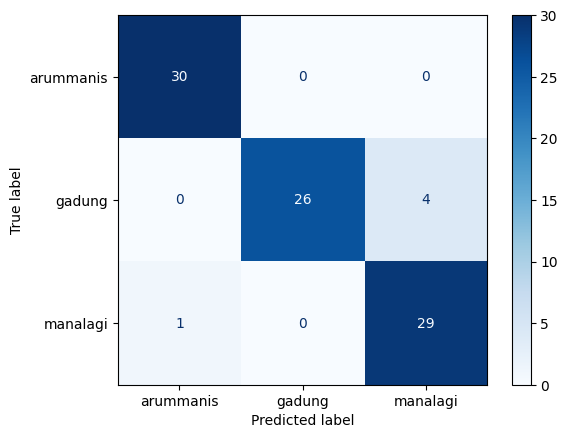

In [36]:
# Skenario 80:20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

svm_model = SVC(kernel='poly', degree=3, C=1)
svm_model.fit(X_train, y_train)

# Prediksi
y_pred = svm_model.predict(X_test)

# joblib.dump(svm_model, 'model.pkl')

# Evaluasi hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=img_categories)
disp.plot(cmap=plt.cm.Blues)  
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
scores = cross_val_score(svm_model, X_scaled, y, cv=cv)

print("Cross-validation scores:", scores)
print("Rata-rata akurasi: {:.2f}%".format(scores.mean() * 100))


Cross-validation scores: [0.9        0.93333333 0.9        0.96666667 0.93333333 0.86666667
 0.9        0.9        0.86666667 1.         1.         0.86666667
 1.         0.96666667 0.86666667]
Rata-rata akurasi: 92.44%


*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Local\Temp\ipykernel_12036\2099991937.py:91: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_vegetable = label[int(predicted_label_idx)]


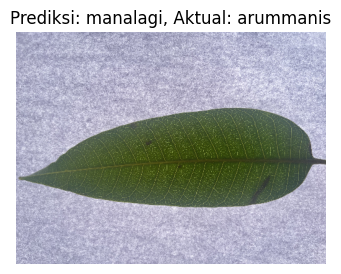

In [9]:
svm_model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')

# dt = "D:/Kuliah/SKRIPSI/code file/dataset"
# img_categories = os.listdir(dt)
label = ['arummanis', 'gadung', 'manalagi']

filters = []
ksize = (15,15)
sigma = 5
theta_list = np.linspace(0, np.pi, 8, endpoint=False)
lambda_list = [np.pi/8, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
gamma = 0.5
psi = 0

def create_gabor_filter_bank():
    filters = []
    for theta in theta_list:
        for lambd in lambda_list:
            kernel = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
            filters.append((kernel, theta, lambd))
    return filters

# ekstraksi fitur Gabor
def apply_gabor_filters(image, filters):
    filtered_images = []
    for kernel, theta, lambd in filters:
        filtered = cv2.filter2D(image, cv2.CV_64F, kernel)
        filtered_images.append(filtered)
    return filtered_images

def generate_predictions(test_image_path, actual_label):
    # 1. Load dan preprocess image
    img_array = cv2.imread(test_image_path)
    resized_img = cv2.resize(img_array, (500, 375))
    output_rgba = rembg.remove(resized_img)
    output_rgb = output_rgba[:, :, :3]
    gray_image = cv2.cvtColor(output_rgb, cv2.COLOR_RGB2GRAY)

    # 2. Ekstraksi fitur LBP
    features = [] 
    lbp = local_binary_pattern(gray_image, P=16, R=2, method='uniform')
        
    
    mask = (gray_image > 0)  
    lbp_masked = lbp[mask]
    
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp_masked, bins=n_bins, range=(0, n_bins), density=True)
    features.append(hist)
    featureLbp = pd.DataFrame(features)
    # flbptranspose = featureLbp.transpose()
    # print("Fitur LBP\n" , featureLbp)

    # 3. Ekstraksi fitur Gabor
    filters = create_gabor_filter_bank()
    feature_dataGbr = []

    filtered_images = apply_gabor_filters(gray_image, filters)
        
    # Buat mask objek
    _, mask = cv2.threshold(gray_image, 10, 255, cv2.THRESH_BINARY)
    mask = mask.astype(bool)

    filtered_images = apply_gabor_filters(gray_image, filters)
        
    features = []
    for fimg in filtered_images:
        # Hitung mean dan varian hanya untuk area objek (mask == True)
        masked_values = fimg[mask]
        mean_val = masked_values.mean()
        var_val = masked_values.var()
        features.extend([mean_val, var_val])

    feature_dataGbr.append(features)

    featureGbr = pd.DataFrame(feature_dataGbr)
    # ftranspose = featureGbrDf.transpose()
    # print("Fitur Gabor\n", featureGbr)

    # # 4. Gabungkan semua fitur
    combined_features = pd.concat([featureLbp, featureGbr], axis=1)
    # print("Fitur Gabungan\n", combined_features)
    
    # 5. Normalisasi data
    X_scaled = scaler.transform(combined_features)
    # print(pd.DataFrame(X_scaled))

    # # 6. Prediksi
    predicted_label_idx = svm_model.predict(X_scaled)
    predicted_vegetable = label[int(predicted_label_idx)]

    # # 7. Visualisasi
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediksi: {predicted_vegetable}, Aktual: {actual_label}")
    plt.axis('off')
    plt.show()

generate_predictions('IMG_1277.jpg', actual_label='arummanis')
